In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Paths to list of subjects and images

In [2]:
project_dir = "/home/nikhil/projects/brain_changes/"

data_dir = "/home/nikhil/projects/brain_changes/data/"
code_dir = "/home/nikhil/projects/brain_changes/brain-diff/"

metadata_dir = f"{code_dir}/metadata/adni/"

# Vincent's download
adni123_long_tracker = f"{metadata_dir}/Nikhil_ADNI123_logitudina_8_04_2021.csv"
nii_paths = f"{metadata_dir}/ADNI123_nii_paths.txt"

# Nikhil's download
adni12_baseline = f"{metadata_dir}/ADNI1-2_Baseline_MP-RAGE_5_08_2022.csv"

adnimerge = f"{metadata_dir}/ADNIMERGE.csv"


### ADNIMERGE

In [11]:
adnimerge_df = pd.read_csv(adnimerge)
print(f"ADNIMERGE len: {len(adnimerge_df)}")

visit_codes = adnimerge_df["VISCODE"].unique()
print(f"number of unique visit codes: {len(visit_codes)}")

ADNI1_subjects = adnimerge_df[adnimerge_df["ORIGPROT"]=="ADNI1"]["PTID"].unique()
ADNI2_subjects = adnimerge_df[adnimerge_df["ORIGPROT"]=="ADNI2"]["PTID"].unique()
ADNI3_subjects = adnimerge_df[adnimerge_df["ORIGPROT"]=="ADNI3"]["PTID"].unique()

print(f"number of ADNI1 subjects: {len(ADNI1_subjects)}, number of ADNI2 subjects: {len(ADNI2_subjects)}, number of ADNI3 subjects: {len(ADNI3_subjects)}")

# example subjects:
sample_sub_id = "130_S_0232"
adnimerge_df[adnimerge_df["PTID"]==sample_sub_id]

ADNIMERGE len: 11483
number of unique visit codes: 19
number of ADNI1 subjects: 819, number of ADNI2 subjects: 787, number of ADNI3 subjects: 0


,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
587,232,130_S_0232,bl,130,ADNI1,ADNI1,2006-03-13,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,0.000000,0.00000,0.0,0,2014-01-15 03:26:57.0
588,232,130_S_0232,m06,130,ADNI1,ADNI1,2006-09-08,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,0.490075,5.86885,6.0,6,2014-07-10 00:24:16.0
589,232,130_S_0232,m12,130,ADNI1,ADNI1,2007-03-15,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,1.004790,12.03280,12.0,12,2014-01-15 03:26:57.0
590,232,130_S_0232,m48,130,ADNI1,ADNI1,2010-03-12,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,3.997260,47.86890,48.0,48,2014-07-10 00:24:16.0
6403,232,130_S_0232,m18,130,ADNI1,ADNI1,2007-09-26,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,1.538670,18.42620,18.0,18,2014-03-12 00:22:58.0
6404,232,130_S_0232,m24,130,ADNI1,ADNI1,2008-03-11,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,1.995890,23.90160,24.0,24,2014-03-12 00:22:58.0
6405,232,130_S_0232,m30,130,ADNI1,ADNI1,2008-09-22,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,2.529770,30.29510,30.0,30,2014-03-12 00:22:58.0
6406,232,130_S_0232,m36,130,ADNI1,ADNI1,2009-03-13,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,3.000680,35.93440,36.0,36,2014-03-12 00:22:58.0
6407,232,130_S_0232,m42,130,ADNI1,ADNI1,2009-09-16,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,3.512660,42.06560,42.0,42,2014-03-12 00:22:58.0
6408,232,130_S_0232,m60,130,ADNIGO,ADNI1,2011-03-29,CN,78.0,Male,...,NaN,NaN,6.19939,NaN,NaN,5.043120,60.39340,60.0,60,2014-07-31 00:26:37.0


In [8]:
cohorts = ["ADNI3"] #["ADNI1","ADNI2","ADNI3"]
PTID_bl = adnimerge_df[adnimerge_df["ORIGPROT"].isin(cohorts) & adnimerge_df["VISCODE"].isin(["bl"])]["PTID"].unique()
PTID_m24 = adnimerge_df[adnimerge_df["ORIGPROT"].isin(cohorts) & adnimerge_df["VISCODE"].isin(["m24"])]["PTID"].unique()

PTID_bl_and_m24 = set(PTID_bl) & set(PTID_m24)

print(f"n_subs, BL: {len(PTID_bl)}, m24: {len(PTID_m24)}, BL and m24: {len(PTID_bl_and_m24)}")

n_subs, BL: 0, m24: 0, BL and m24: 0


In [6]:
downloaded_baseline_PTID = pd.read_csv(adni12_baseline)["Subject"].unique()
print(f"number of downloaded baseline subjects: {len(downloaded_baseline_PTID)}")

number of downloaded baseline subjects: 780


In [7]:
len(set(PTID_bl_and_m24) & set(downloaded_baseline_PTID))

640

In [176]:

subjects_to_be_downloaded = PTID_bl_and_m24 - set(downloaded_baseline_PTID)
print(f"number of baseline subjects to be downloaded: {len(subjects_to_be_downloaded)}")

list(subjects_to_be_downloaded)[:4]

number of baseline subjects to be downloaded: 111


['068_S_4424', '127_S_4148', '127_S_4928', '109_S_4531']

### Image and subject ID dataframe

In [143]:
tab_data = pd.read_csv(adni123_long_tracker)

subject_ids = tab_data["Subject"].unique()
image_ids = tab_data["Image Data ID"].unique()
print(f"n_subjects: {len(subject_ids)}, n_images: {len(image_ids)}")

tab_visits = tab_data["Visit"].unique()
print(f"unique visits (n={len(tab_visits)}): {np.sort(tab_visits)}")

tab_data.head()

n_subjects: 1057, n_images: 3573
unique visits (n=13): [ 3  4  5  6  8 10 17 25 28 30 32 34 36]


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I395985,130_S_4982,AD,F,59,28,MRI,MPRAGE,Original,10/25/2013,DCM,NaN
1,I133856,041_S_1002,CN,F,79,6,MRI,MPRAGE,Original,1/14/2009,DCM,8/03/2021
2,I709520,037_S_4706,EMCI,M,65,34,MRI,MPRAGE,Original,5/18/2016,DCM,NaN
3,I320038,141_S_4426,LMCI,M,78,25,MRI,MPRAGE,Original,7/28/2012,DCM,8/03/2021
4,I54724,099_S_0470,AD,F,88,4,MRI,MPRAGE,Original,5/17/2007,DCM,8/03/2021


In [144]:
FU_PTID = set(tab_data["Subject"].unique())
PTID_to_be_downloaded = PTID_bl_and_m24 - FU_PTID
len(PTID_to_be_downloaded)

92

#### Count baseline and follow-up subjects
- According to Vincent, baseline visits: ADNI1=v2, ADNI2=v3
- Some follow up subject may not have baseline scan

In [106]:
baseline_df = tab_data[tab_data["Visit"].isin([2,3])]
baseline_subject_ids = baseline_df["Subject"].unique()
print(f"n_baseline_subjects: {len(baseline_subject_ids)}")
baseline_df.head()

n_baseline_subjects: 470


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
9,I41432,073_S_0565,AD,M,75,3,MRI,MPRAGE,Original,2/21/2007,DCM,8/03/2021
13,I241086,035_S_2074,EMCI,M,63,3,MRI,MPRAGE,Original,5/27/2011,DCM,8/03/2021
19,I11739,011_S_0005,CN,M,74,3,MRI,MPRAGE,Original,3/09/2006,DCM,8/03/2021
20,I342401,036_S_2380,EMCI,M,69,3,MRI,MPRAGE,Original,2/13/2012,DCM,8/03/2021
26,I55847,041_S_1010,MCI,M,75,3,MRI,MPRAGE,Original,6/04/2007,DCM,8/03/2021


In [107]:
followup_df = tab_data.drop_duplicates(subset=["Subject","Acq Date"], keep="last")
 
scan_count_df = pd.DataFrame(followup_df["Subject"].value_counts())
scan_count_df.columns = ["n_scans"]

subject_ids_follow_up = scan_count_df[scan_count_df["n_scans"]>1]
n_follow_up_scans = len(subject_ids_follow_up)
print(f"number of subject with follow-up scans: {n_follow_up_scans}")

scan_count_df.head()

number of subject with follow-up scans: 878


,n_scans
016_S_1326,11
023_S_0061,11
051_S_1072,11
016_S_1117,10
051_S_1123,10


#### Followup data with baseline scan

In [108]:
followup_df = followup_df[followup_df["Subject"].isin(baseline_subject_ids)]

followup_subject_ids = followup_df["Subject"].unique()
print(f"n_followup_subjects (with baseline scan): {len(followup_subject_ids)}")

followup_df.head()

n_followup_subjects (with baseline scan): 470


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
1,I133856,041_S_1002,CN,F,79,6,MRI,MPRAGE,Original,1/14/2009,DCM,8/03/2021
4,I54724,099_S_0470,AD,F,88,4,MRI,MPRAGE,Original,5/17/2007,DCM,8/03/2021
6,I115699,073_S_0565,AD,M,77,6,MRI,MPRAGE,Original,8/07/2008,DCM,8/03/2021
9,I41432,073_S_0565,AD,M,75,3,MRI,MPRAGE,Original,2/21/2007,DCM,8/03/2021
11,I99467,011_S_0861,MCI,M,89,5,MRI,MPRAGE,Original,3/25/2008,DCM,8/03/2021


### Read all available nii paths

In [109]:
nii_path_list = list(pd.read_csv(nii_paths,header=None)[0].values)

print(f"number of nii paths: {len(nii_path_list)}")
nii_path_list[:5]

number of nii paths: 3573


['Nikhil_ADNI123_logitudina_1/ADNI/130_S_5006/MPRAGE/2013-11-19_08_24_00.0/S206366/ADNI_130_S_5006_MR_MPRAGE_br_raw_20131120163349431_29_S206366_I398910.nii',
 'Nikhil_ADNI123_logitudina_1/ADNI/032_S_1101/MPRAGE/2007-12-06_11_37_36.0/S43475/ADNI_032_S_1101_MR_MPRAGE_br_raw_20071207154325604_153_S43475_I84378.nii',
 'Nikhil_ADNI123_logitudina_1/ADNI/082_S_2099/MPRAGE/2012-11-20_11_56_11.0/S175414/ADNI_082_S_2099_MR_MPRAGE_br_raw_20121126143141538_56_S175414_I347838.nii',
 'Nikhil_ADNI123_logitudina_1/ADNI/941_S_4292/MPRAGE/2013-09-23_11_10_32.0/S201936/ADNI_941_S_4292_MR_MPRAGE_br_raw_20130924150005720_138_S201936_I391682.nii',
 'Nikhil_ADNI123_logitudina_1/ADNI/018_S_0286/MPRAGE/2007-05-15_09_24_51.0/S32252/ADNI_018_S_0286_MR_MPRAGE_br_raw_20070515105100617_85_S32252_I54435.nii']

In [116]:
def get_subject_info_from_path(p):
    nii_file_name = p.rsplit("/",1)[1]
    ptid = nii_file_name.split("_")[1] + "_S_" + nii_file_name.split("_")[3]
    acq_date = p.rsplit("/",3)[1].split("_")[0]
    img_id = nii_file_name[::-1].split(".")[1].split("_")[0][::-1]

    return ptid, acq_date, img_id

def get_closest_visit_code(subject_df, acq_date):
    # find the closest date match
    date_diff_list = (pd.to_datetime(subject_df['EXAMDATE'].values, yearfirst=True, format="%Y/%m/%d") - 
                pd.to_datetime(acq_date, yearfirst=True, format="%Y/%m/%d"))

    closest_date_idx = np.argmin(np.abs(date_diff_list))
    diff_in_days = np.min(np.abs(date_diff_list)).days
    closest_date = subject_df['EXAMDATE'].values[closest_date_idx]

    visit_code = subject_df[subject_df["EXAMDATE"]==closest_date]['VISCODE'].values[0]

    return visit_code, diff_in_days

In [117]:
p = nii_path_list[0]
get_subject_info_from_path(p)

Nikhil_ADNI123_logitudina_1/ADNI/130_S_5006/MPRAGE/2013-11-19_08_24_00.0/S206366/ADNI_130_S_5006_MR_MPRAGE_br_raw_20131120163349431_29_S206366_I398910.nii
ADNI_130_S_5006_MR_MPRAGE_br_raw_20131120163349431_29_S206366_I398910.nii
130_S_5006


('130_S_5006', '2013-11-19', 'I398910')

In [125]:
nii_path_df = pd.DataFrame()
for p in nii_path_list[:5]:
    ptid, acq_date, img_id = get_subject_info_from_path(p)

    subject_df = adnimerge_df[(adnimerge_df["PTID"]==ptid)]
    
    visit_code, diff_in_days = get_closest_visit_code(subject_df, acq_date)

    df = pd.DataFrame(columns=["PTID","IID","visit_code","acq_date","diff_in_days"])
    df.loc[0] = [ptid, img_id, visit_code, acq_date, diff_in_days]
    nii_path_df = pd.concat([nii_path_df,df],axis=0)

Nikhil_ADNI123_logitudina_1/ADNI/130_S_5006/MPRAGE/2013-11-19_08_24_00.0/S206366/ADNI_130_S_5006_MR_MPRAGE_br_raw_20131120163349431_29_S206366_I398910.nii
ADNI_130_S_5006_MR_MPRAGE_br_raw_20131120163349431_29_S206366_I398910.nii
130_S_5006
Nikhil_ADNI123_logitudina_1/ADNI/032_S_1101/MPRAGE/2007-12-06_11_37_36.0/S43475/ADNI_032_S_1101_MR_MPRAGE_br_raw_20071207154325604_153_S43475_I84378.nii
ADNI_032_S_1101_MR_MPRAGE_br_raw_20071207154325604_153_S43475_I84378.nii
032_S_1101
Nikhil_ADNI123_logitudina_1/ADNI/082_S_2099/MPRAGE/2012-11-20_11_56_11.0/S175414/ADNI_082_S_2099_MR_MPRAGE_br_raw_20121126143141538_56_S175414_I347838.nii
ADNI_082_S_2099_MR_MPRAGE_br_raw_20121126143141538_56_S175414_I347838.nii
082_S_2099
Nikhil_ADNI123_logitudina_1/ADNI/941_S_4292/MPRAGE/2013-09-23_11_10_32.0/S201936/ADNI_941_S_4292_MR_MPRAGE_br_raw_20130924150005720_138_S201936_I391682.nii
ADNI_941_S_4292_MR_MPRAGE_br_raw_20130924150005720_138_S201936_I391682.nii
941_S_4292
Nikhil_ADNI123_logitudina_1/ADNI/018_S_02

### Compare "Visit" number from followup / tab df to "visit_code" match from ADNIMERGE
- Looks like many of the "m06" from adnimerge are coded as visit "3" in tab_data from Vincent
- M24 looks fine.

In [53]:
followup_df = followup_df[["Image Data ID","Subject","Visit","Acq Date","Age"]]
followup_df = followup_df.rename(columns={"Image Data ID":"IID","Subject":"PTID"})
followup_visit_merge_df = pd.merge(followup_df, nii_path_df, on=["PTID","IID"], how="left")

In [89]:
followup_visit_merge_df[followup_visit_merge_df["visit_code"]=="m24"]

,IID,PTID,Visit,Acq Date,Age,visit_code,acq_date,diff_in_days
0,I133856,041_S_1002,6,1/14/2009,79,m24,2009-01-14,0
2,I115699,073_S_0565,6,8/07/2008,77,m24,2008-08-07,0
13,I136391,051_S_1123,6,2/18/2009,78,m24,2009-02-18,0
23,I344453,128_S_2045,28,10/18/2012,75,m24,2012-10-18,9
25,I139137,041_S_1368,6,3/16/2009,77,m24,2009-03-16,0
...,...,...,...,...,...,...,...,...
1714,I106649,099_S_0551,6,5/23/2008,66,m24,2008-05-23,20
1723,I128168,036_S_0945,6,11/24/2008,75,m24,2008-11-24,3
1725,I108863,031_S_0568,6,6/06/2008,82,m24,2008-06-06,4
1727,I90493,114_S_0173,6,2/14/2008,75,m24,2008-02-14,2


In [56]:
# example subjects:
sample_sub_id = "073_S_0565"
adnimerge_df[adnimerge_df["PTID"]==sample_sub_id]

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
1335,565,073_S_0565,m06,73,ADNI1,ADNI1,2007-02-14,AD,74.6,Male,...,NaN,NaN,4.6359,NaN,NaN,0.533881,6.39344,6.0,6,2014-01-15 03:26:58.0
7144,565,073_S_0565,bl,73,ADNI1,ADNI1,2006-08-03,AD,74.6,Male,...,NaN,NaN,4.6359,NaN,NaN,0.000000,0.00000,0.0,0,2014-03-12 00:22:59.0
7145,565,073_S_0565,m12,73,ADNI1,ADNI1,2007-08-02,AD,74.6,Male,...,NaN,NaN,4.6359,NaN,NaN,0.996578,11.93440,12.0,12,2014-04-30 00:24:11.0
7146,565,073_S_0565,m18,73,ADNI1,ADNI1,2008-02-15,AD,74.6,Male,...,NaN,NaN,4.6359,NaN,NaN,1.535930,18.39340,18.0,18,2014-03-12 00:22:59.0
7147,565,073_S_0565,m24,73,ADNI1,ADNI1,2008-08-07,AD,74.6,Male,...,NaN,NaN,4.6359,NaN,NaN,2.012320,24.09840,24.0,24,2014-03-12 00:22:59.0


In [59]:
tab_data[tab_data["Subject"]==sample_sub_id]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
6,I115699,073_S_0565,AD,M,77,6,MRI,MPRAGE,Original,8/07/2008,DCM,8/03/2021
9,I41432,073_S_0565,AD,M,75,3,MRI,MPRAGE,Original,2/21/2007,DCM,8/03/2021
390,I71764,073_S_0565,AD,M,76,4,MRI,MPRAGE,Original,9/04/2007,DCM,8/03/2021


In [58]:
nii_path_df[nii_path_df["PTID"]==sample_sub_id]

,PTID,IID,visit_code,acq_date,diff_in_days
0,073_S_0565,I41432,m06,2007-02-21,7
0,073_S_0565,I115699,m24,2008-08-07,0
0,073_S_0565,I71764,m12,2007-09-04,33


## Plot scan distributions

## Age distribution

In [6]:
# Remove duplicate images based on identical subject ID and age
follow_up_data = tab_data[tab_data["Subject"].isin(subject_ids_follow_up.index)]
follow_up_data = follow_up_data.sort_values(["Subject","Age","Image Data ID"])

age_data_first_df = follow_up_data.drop_duplicates(subset=['Subject'],keep="first")
age_data_last_df = follow_up_data.drop_duplicates(subset=['Subject'],keep="last")
scan_max_age_diff = age_data_last_df["Age"].values - age_data_first_df["Age"].values
age_data_df = age_data_first_df.copy()
age_data_df["max_age_diff"] = scan_max_age_diff
age_data_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,max_age_diff
3570,I30119,002_S_0413,CN,F,77,3,MRI,MPRAGE,Original,11/15/2006,DCM,NaN,8
3561,I32918,002_S_0559,CN,M,80,3,MRI,MPRAGE,Original,12/12/2006,DCM,NaN,2
3556,I71857,002_S_0729,MCI,F,66,4,MRI,MPRAGE,Original,9/05/2007,DCM,NaN,6
3547,I53479,002_S_0954,MCI,F,70,3,MRI,MPRAGE,Original,5/03/2007,DCM,NaN,1
3545,I57072,002_S_1018,AD,F,71,3,MRI,MPRAGE,Original,6/14/2007,DCM,NaN,2


In [17]:
follow_up_data['Visit'].unique()

array([ 3,  4,  6,  8, 28, 30, 32, 34,  5, 10, 36, 25, 17])

In [41]:
follow_up_data[follow_up_data["Subject"]=="130_S_5006"]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
413,I373028,130_S_5006,AD,F,69,25,MRI,MPRAGE,Original,5/17/2013,DCM,NaN
412,I398910,130_S_5006,AD,F,69,28,MRI,MPRAGE,Original,11/19/2013,DCM,NaN


<AxesSubplot:xlabel='Age', ylabel='Count'>

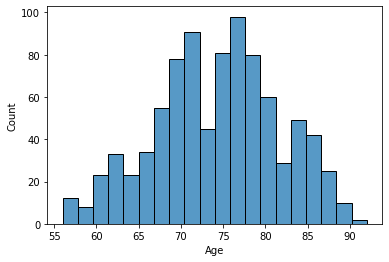

In [7]:
sns.histplot(age_data_df["Age"])

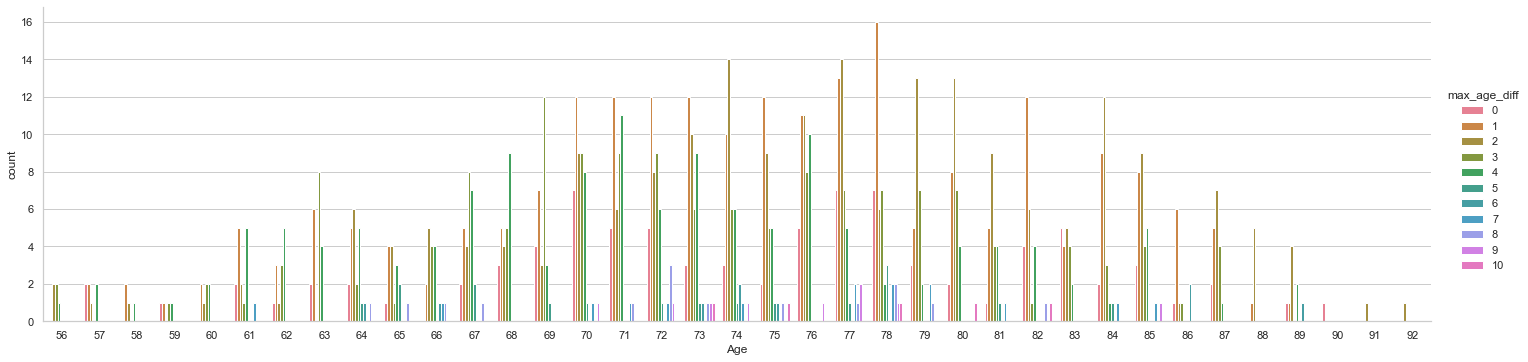

In [8]:
plot_df = age_data_df.copy()
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="Age", hue="max_age_diff", kind='count',
    aspect=4, height=5, palette = palette, data=plot_df)

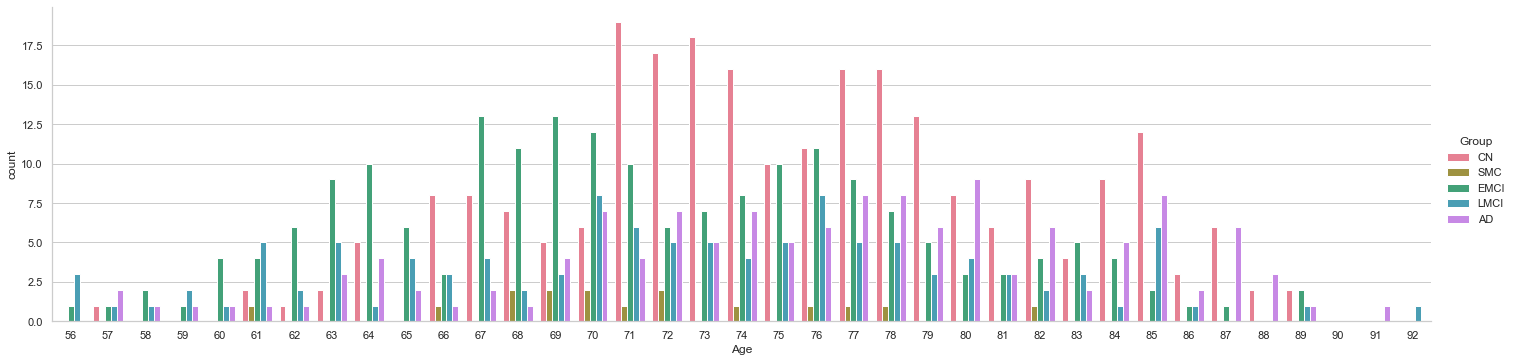

In [62]:
DX_order = ["CN","SMC","EMCI","LMCI","AD"]
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="Age", hue="Group", kind='count', hue_order=DX_order,
    aspect=4, height=5, palette = palette, data=plot_df)